In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [6]:
!wget -nc -nd -P data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet

File ‘data/yellow_tripdata_2023-01.parquet’ already there; not retrieving.



In [7]:
!wget -nc -nd -P data https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

--2024-05-21 23:42:34--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.172.223.91, 18.172.223.120, 18.172.223.180, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.172.223.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47748012 (46M) [application/x-www-form-urlencoded]
Saving to: ‘data/yellow_tripdata_2023-02.parquet’

yellow_tripdata_202 100%[===================>]  45.54M  13.3MB/s    in 3.7s    

2024-05-21 23:42:38 (12.4 MB/s) - ‘data/yellow_tripdata_2023-02.parquet’ saved [47748012/47748012]



In [8]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)


#### Q1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### Q2

In [10]:
df.duration.std()

42.594351241920904

<Axes: xlabel='duration'>

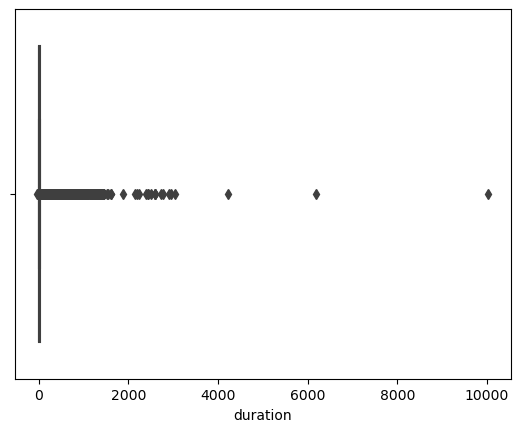

In [11]:
sns.boxplot(x=df.duration)

#### Q3

In [12]:
s_b = len(df)
df = df[(df.duration >= 1) & (df.duration <= 60)]
s_a = len(df)
print(s_a/s_b * 100)

98.1220282212598


#### Q4

In [13]:
categorical = ['PULocationID', 'DOLocationID']

In [14]:
df[categorical] = df[categorical].astype(str)

In [15]:
train_dicts = df[categorical].to_dict(orient='records')

In [16]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [17]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

#### Q5

In [18]:
target = 'duration'
y_train = df[target].values

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.6492622370693075

#### Q6

In [21]:
def read_df(filename):
    res = pd.read_parquet(filename)
    res['duration'] = res.tpep_dropoff_datetime - res.tpep_pickup_datetime
    res.duration = res.duration.apply(lambda td: td.total_seconds() / 60)
    res = res[(res.duration >= 1) & (res.duration <= 60)]
    categorical = ['PULocationID', 'DOLocationID']
    res[categorical] = res[categorical].astype(str)
    return res

In [22]:
df_train = read_df('./data/yellow_tripdata_2023-01.parquet')
df_val = read_df('./data/yellow_tripdata_2023-02.parquet')

In [23]:
train_dicts = df_train[categorical].to_dict(orient='records')

In [24]:
val_dicts = df_val[categorical].to_dict(orient='records')

In [25]:
dv = DictVectorizer()

In [26]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [27]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)
mean_squared_error(y_train, y_pred_train, squared=False)

7.6492622370693075

In [30]:
mean_squared_error(y_val, y_pred_val, squared=False)

7.811813068335911